<a href="https://colab.research.google.com/github/abt3/UMBC-CMSC-471-Fall-2019/blob/master/Trankle_A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMSC478 - Assignment 0: Tech Setup and Colab

*Abigail Trankle, KW44490* 

## Overview and Learning Objectives

This assignment prepares you for the upcoming assignments to make sure that you have setup the frameworks. 

# Part I - Python Setup

In <b>Part I</b> of this Jupyter Notebook, you must run the following cell and make sure that your Python version is correct. Depending on what OS you're using, your output might be slightly different but the Python version must be 3.x.

In [0]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Version info.
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


> Next, run the following cell which is an example from [matplotlib documentstion](https://matplotlib.org/gallery/index.html).

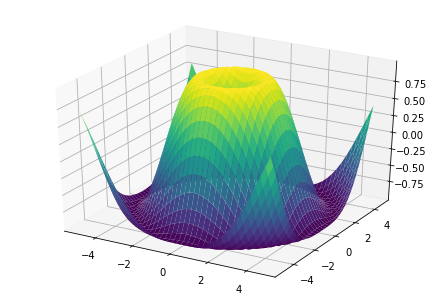

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

>Next, run the following classifier comparison example from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

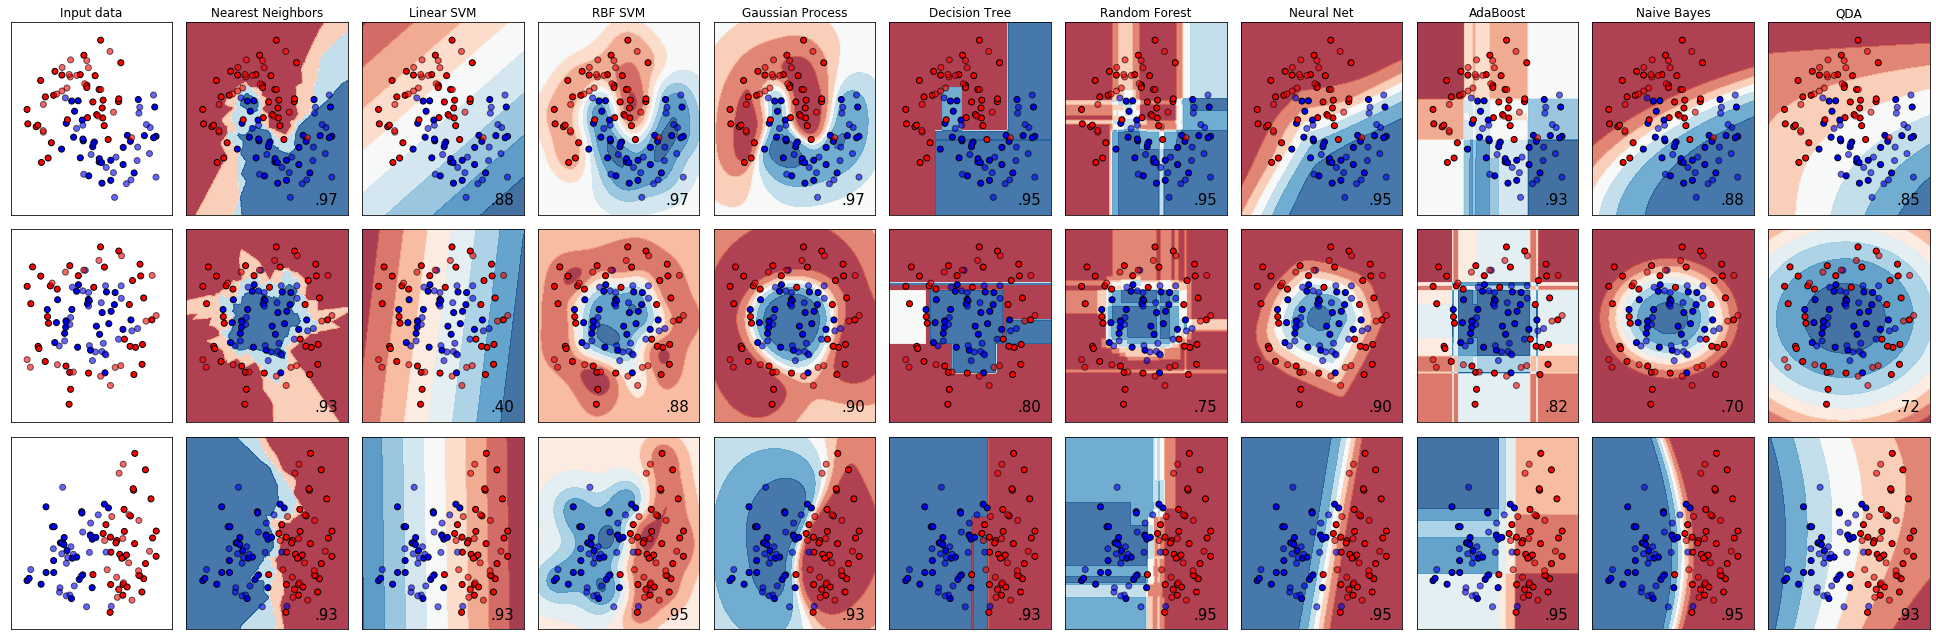

In [0]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Part II - GAN Talk by Ian Goodfellow

In Part II, watch the first 10 minutes of [Ian Goodfellow's talk](https://www.youtube.com/watch?v=sucqskXRkss) - the author of the [Deep Learning textbook](http://www.deeplearningbook.org/) - at ICLR-2019 conference where he discusses the recent advances in Adversarial Machine Learning. Don't worry if you don't fully understand what he explains. Generative Adversarial Network (GAN) is an advanced topic, and we've just started the basics of ML! Feel free to watch the entire talk.

Summarize your understanding of the first 10 minutes in 2 to 3 sentences HERE:





## Part III - Trying Colab

In Part III, you should run your notebook in [Colab](https://colab.research.google.com) and take a screenshot after you run it in Colab. First upload your notebook to your Google Drive Account. Alternatively, you can click on "File" menu in Colab page, and then click "Upload notebook". 

Once you run the notebook in Colab, take a screenshot, save the image in the same working directory of your notebook here.

Name the screenshot file: `colab.png`

There is a link in the following cell that, once you save the image in the notebook working directory, will be displayed.

Try to change the zoom of your web browser so that the screenshot shows all of your notebook.

Your Colab screenshot will be displayed HERE:

<center><img src="colab.png" align="center"/></center>

##  Grading

Assignment 0 has 10 points. The breakdown is as follows:

Part I - Python Setup: 5 points

Part II - GAN talk: 3 points

Part III: Colab: 2 points

## How to Submit and Due Date

First, name your notebook ```Lastname-A0.ipynb```.  So, for me it would be ```Vafaei-A0.ipynb```.  

Then, make a zip file of your Jupyter Notebook .ipynb file and the screenshot of Colab `colab.png`

Also, name the zip file ```Lastname-A0.zip```

Submit the zip file using the ```Assignment-0``` link on Blackboard.

Grading will be based on completeness and correctness of all the required tasks, prompts and questions. Points will be deducted if you have mistakes in naming the files and/or in making the zip file.

  
<font color=red><b>Due Date: Thursday Feb 6th, 11:59PM</b></font>